<a href="https://colab.research.google.com/github/hydermbs/data_science_projects/blob/main/EDA_On_Pakistan_startup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import file and assign it to variable

In [22]:
from google.colab import files
uploaded = files.upload()


Saving Pakistan Startup Census.csv to Pakistan Startup Census.csv


In [151]:
startup= pd.read_csv('Pakistan Startup Census.csv')
startup.head()


,Name,Location,Tagline,Category,Website,Founded,Description
0,Outnet,Karachi Pakistan,Cloud based SaaS platform for planning procur...,Advertising OOH Outdoor Advertising Data an...,http://www.outnet.com.pk,1st September 2014,24Grey is a T4M (technology for marketing) com...
1,7Vals,Lahore Pakistan,Understanding and enabling businesses to impro...,Consulting Rails Product Development UI,http://www.7vals.com,2011,We're changing the way businesses work by maki...
2,92Solution,Lahore Pakistan,92 Solution A Pakistani Company Giving his Pa...,Consulting Website & Software Development,http://92solution.com,7th January 2015,92 Solution is a Software & Website Developmen...
3,A2Z Yellow Pages & Info Services,Lahore,Find local Businesses and Services in Pakistan...,Online Business Directory & Portal,https://www.yp-pak.com,30th January 2017,A2Z| Yellow Pages Pakistan will be the innovat...
4,AALogics,Karachi Pakistan,NaN,Consulting Software,http://www.aalogics.com,1st August 2014,IT Consulting Web development & Designing Lo...


# Find the quantity of Rows and Columns

In [111]:
startup.shape

(553, 7)

# Find the Columns name

In [112]:
startup.columns

Index(['Name', 'Location', 'Tagline', 'Category', 'Website', 'Founded',
       'Description'],
      dtype='object')

# Find and Drop Null Values if any

In [113]:
startup.isnull().sum()

Name           120
Location       120
Tagline        122
Category       120
Website        135
Founded        120
Description    163
dtype: int64

In [114]:
#drop complete null rows
startup.dropna(how='all',inplace=True)

In [36]:
startup.isnull().sum()

Name            0
Location        0
Tagline         2
Category        0
Website        15
Founded         0
Description    43
dtype: int64

In [115]:
startup.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 433 entries, 0 to 432
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         433 non-null    object
 1   Location     433 non-null    object
 2   Tagline      431 non-null    object
 3   Category     433 non-null    object
 4   Website      418 non-null    object
 5   Founded      433 non-null    object
 6   Description  390 non-null    object
dtypes: object(7)
memory usage: 27.1+ KB


In [152]:
startup = startup.astype('string')

# Find startups categories and Cities and count it

In [117]:
startup[['Category','Location']].nunique()


Category    278
Location     67
dtype: int64

In [118]:
startup['Category'].unique()

<StringArray>
[                    'Advertising  OOH  Outdoor Advertising  Data and Analytics',
                                    'Consulting  Rails  Product Development  UI',
                                    'Consulting  Website & Software Development',
                                            'Online Business Directory & Portal',
                                                          'Consulting  Software',
                                                       'Application  E-commerce',
                                               'Collection  Microfinance  Bills',
                                                'Fashion E-Commerce Marketplace',
                                                                      'Software',
                                             'Mobile Apps & Web based Software ',
 ...
 'Advertising  OOH  Outdoor Advertising  Data and Analytics Vehicle Advertising',
                                                                           'Web

In [119]:
startup['Location'].unique()

<StringArray>
[                                                                               'Karachi  Pakistan',
                                                                                 'Lahore  Pakistan',
                                                                                           'Lahore',
                                                           'Nowshera  Khyber Pakhtunkhwa  Pakistan',
                                                                              'Islamabad  PAkistan',
                                                                        'San Francisco  California',
                                                                              'Islamabad  Pakistan',
                                                                                          'Karachi',
                                           '214  Block B  13D/2 Gulshan e Iqbal Karachi  Pakistan ',
                                                                             

# Make new dataset with addition columns of city name and remove location from abroad

In [153]:
# create new dataset that drops any location not in Pakistan
a = ["States",'Raleigh', 'York','USA','Canada','England', 'California', 'Los','South','Amsterdam']
pak = startup[~startup.Location.str.contains('|'.join(a))]

# Make location data only city names
city = set(['Karachi', 'Lahore', 'Islamabad','Faisalabad','Rawalpindi',
        'Peshawar','Gujrat','Sialkot','Hyderabad','Multan','Sargodha',
        'Faisalabad','Quetta','Wah','Gujranwala','Pakhtunkhwa'
       ])


pak['City'] = pak.Location.str.extract('({0})'.format('|'.join(city)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [121]:
pak.head()

,Name,Location,Tagline,Category,Website,Founded,Description,City
0,Outnet,Karachi Pakistan,Cloud based SaaS platform for planning procur...,Advertising OOH Outdoor Advertising Data an...,http://www.outnet.com.pk,1st September 2014,24Grey is a T4M (technology for marketing) com...,Karachi
1,7Vals,Lahore Pakistan,Understanding and enabling businesses to impro...,Consulting Rails Product Development UI,http://www.7vals.com,2011,We're changing the way businesses work by maki...,Lahore
2,92Solution,Lahore Pakistan,92 Solution A Pakistani Company Giving his Pa...,Consulting Website & Software Development,http://92solution.com,7th January 2015,92 Solution is a Software & Website Developmen...,Lahore
3,A2Z Yellow Pages & Info Services,Lahore,Find local Businesses and Services in Pakistan...,Online Business Directory & Portal,https://www.yp-pak.com,30th January 2017,A2Z| Yellow Pages Pakistan will be the innovat...,Lahore
4,AALogics,Karachi Pakistan,<NA>,Consulting Software,http://www.aalogics.com,1st August 2014,IT Consulting Web development & Designing Lo...,Karachi


# Founded Years

In [154]:
pak[['Founded','Month','Year']]=pak.Founded.str.split(" ",n=2,expand=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [155]:
pak.drop(['Founded','Month'],axis=1,inplace=True)



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [161]:
pak['Year']=pd.to_numeric(pak['Year'],errors='coerce')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Pakistan Startups')

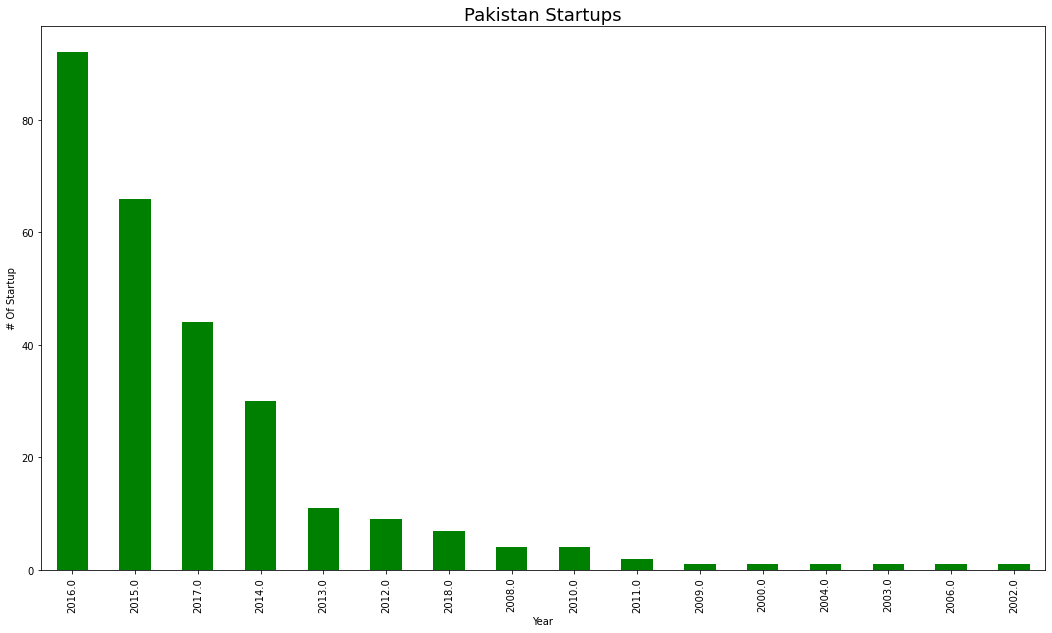

In [162]:
year_founded=pak[(pak['Year']>1999)]
plt.subplots(figsize=(18,10))
year_founded.Year.value_counts().plot(kind='bar',color='green')
plt.xlabel('Year')
plt.ylabel('# Of Startup')
plt.title('Pakistan Startups',fontsize=18)